# Introduction

## Topic

Stack Overflow annually surveys developers on aspects such as education, job, salary, technology used, coding experience etc. <br> In this notebook we perform a regression analysis on this survey data. The goal is to predict the salary of a developer based on categorical and numerical variables. Since there are a lot of potential independent variables in the dataset, we apply techniques like feature selection and clustering to build an appropriate model.

## Data
We use the developer survey from 2021. This survey contains responses of 83'439 software developers from 181 countries around the world. The data can be downloaded here: [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey?_ga=2.260775684.821588860.1635366344-21374842.1635366344)

# Overview
The notebook is structured as follows:
1) **Exploration**: In first section we gain an overview of the variables and their data types. We also remove rows and columns that are not needed and remove outliers. Finally, the target, the categorical and the numerical features are analyzed with visualizations. 

2) **Feature Engineering**: In this section we reduce features to fewer categories and create new features based on existing ones. Furthermore we apply clustering on one specific variable. 

3) **Data Preprocessing**: Machine Learning algorithms need the data in a specific form. We need to encode, impute and standardize our features. 

4) **Regression Analysis**: Finally we perform the regression analysis and evaluate the performance. For the regressor we use the scikit-learn implementation of the Neural Network. 

## Outcome
A regression-model which predicts a typical/fair salary for a developer with specific attributes. Such a model can be attractive for both sides (employer and employee) in wage negotiations.

In [1]:
# Import packages
# General
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import pickle
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Clustering
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# Machine Learning System
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [2]:
# Set dataframe options
pd.set_option("display.max_columns",100) # increase max number of columns to display
pd.options.display.float_format = '{:.2f}'.format # surpress scientific notation

In [3]:
# Set plotting options
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False}) # remove gridlines

In [4]:
# Read data
df = pd.read_csv("survey_results_public.csv",index_col=0) # dataset
schema = pd.read_csv("survey_results_schema.csv") # schema

# 1 ) Exploration

In [5]:
df.shape # 83'439 observations

(83439, 47)

In [6]:
df.head(5)

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.00,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.00
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cass

In [7]:
# Parse HTML of the variable "question"
schema["question"] = schema["question"].apply(lambda row: BeautifulSoup(row).get_text())

In [8]:
# Display questions
pd.set_option('display.max_colwidth', 500)
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"Hello world! \n \nThank you for taking the 2021 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. \n \nAs in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept o...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,Basic Information\n\nThe first section will focus on some basic information about who you are.\n\nMost questions in this section are required. Required questions are noted with *.,False,DB,TB
3,QID2,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" *",True,MC,SAVR
4,QID24,Employment,Which of the following best describes your current employment status?,False,MC,MAVR
5,QID6,Country,Where do you live? *,True,MC,DL
6,QID7,US_State,In which state or territory of the USA do you live? This information will be kept private.,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you live? This information will be kept private.,False,MC,DL
8,QID190,S2,"Education, work, and career\n\nThis section will focus on your education, work, and career.\n\nMost questions in this section are optional. Required questions are noted with *.",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *,False,MC,SAVR


In [9]:
pd.reset_option('display.max_colwidth')

In [10]:
# Get info about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83439 entries, 1 to 83439
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    83439 non-null  object 
 1   Employment                    83323 non-null  object 
 2   Country                       83439 non-null  object 
 3   US_State                      14920 non-null  object 
 4   UK_Country                    4418 non-null   object 
 5   EdLevel                       83126 non-null  object 
 6   Age1stCode                    83243 non-null  object 
 7   LearnCode                     82963 non-null  object 
 8   YearsCode                     81641 non-null  object 
 9   YearsCodePro                  61216 non-null  object 
 10  DevType                       66484 non-null  object 
 11  OrgSize                       60726 non-null  object 
 12  Currency                      61080 non-null  object 
 13  C

## Check datatype

Partition the data by datatype and check if the feature is numerical or categorical. 

In [11]:
# Only select variables of type float.
df.select_dtypes(include=['float64'])

,CompTotal,ConvertedCompYearly
ResponseId,,
1,4800.00,62268.00
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
83435,160500.00,160500.00
83436,200000.00,3960.00
83437,1800.00,90000.00


Both should be treated as numerical.

In [12]:
# Only select variables of type object.
df.select_dtypes(include=['object'])

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,Apache Spark;Hadoop;

The following features should be treated as numerical:
 - YearsCode
 - YearsCodePro

The other variables are categorical.

In [13]:
# This variable is stored as an object because we have two categories which are stored as string. 
# We need to change them to float/int. 
df["YearsCode"].value_counts()

5                     6190
10                    6067
6                     5565
4                     5049
7                     4940
8                     4714
3                     4449
15                    3625
20                    3419
2                     3342
12                    3188
9                     3009
11                    2344
13                    2016
25                    1984
14                    1813
1                     1695
30                    1660
16                    1491
Less than 1 year      1489
18                    1386
17                    1331
35                    1007
22                     941
21                     863
40                     830
23                     811
19                     659
24                     639
26                     533
27                     492
28                     455
38                     361
32                     331
37                     329
33                     309
34                     268
3

In [29]:
# Encode "Less than 1 year" with 0
df.loc[df["YearsCode"]=="Less than 1 year","YearsCode"] = 0
df.loc[df["YearsCodePro"]=="Less than 1 year","YearsCodePro"] = 0
# Encode "More than 50 years" with 50
df.loc[df["YearsCode"]=="More than 50 years","YearsCode"] = 50
df.loc[df["YearsCodePro"]=="More than 50 years","YearsCodePro"] = 50
# Change type to float
df["YearsCode"]= df["YearsCode"].astype(float)
df["YearsCodePro"]= df["YearsCodePro"].astype(float)

## Clean and analyze target feature

ConvertedCompYearly will be our target features. We delete observations with no entry for ConvertedCompYearly (Salary)

In [15]:
df = df.loc[df["ConvertedCompYearly"].notnull(),:]

In [16]:
df.shape # 46'844 observations remain

(46844, 47)

In [17]:
# Look at distribution of compensation
# We will need to filter out outliers (invalid values)
df["ConvertedCompYearly"].describe()

count      46844.00
mean      118426.15
std       527294.36
min            1.00
25%        27025.00
50%        56211.00
75%       100000.00
max     45241312.00
Name: ConvertedCompYearly, dtype: float64

Plot distribution of Compensation before cleaning. Red x's are the top 10 outliers on the upper end.

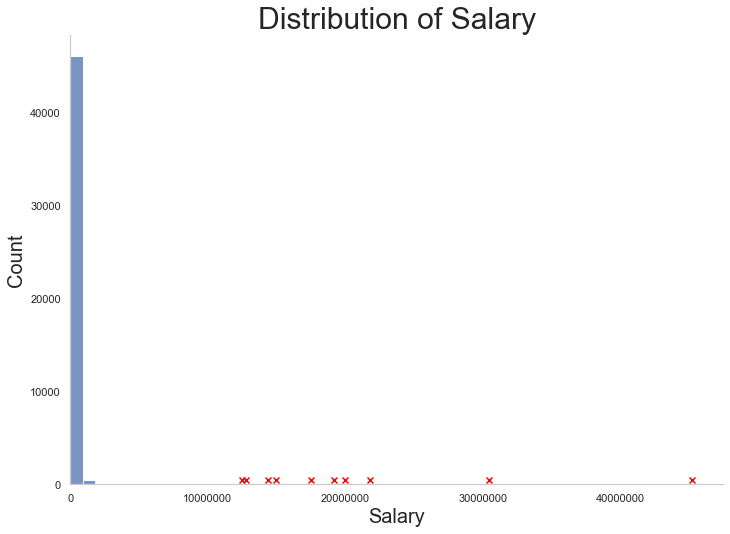

In [18]:
# Get top 10 outliers
top_outliers = df["ConvertedCompYearly"].sort_values(ascending=False).head(10).values

# Plot distribution
ax = sns.histplot(df["ConvertedCompYearly"], bins=50)
plt.ticklabel_format(style='plain') # suppress scientific notation
ax.set_ylabel("Count",fontsize=20)
ax.set_xlabel("Salary",fontsize=20)
ax.set_title("Distribution of Salary", fontsize=30)
ax.set_xlim(xmin=0) # should start at 0 on x-axis
ax.spines['right'].set_visible(False) # remove right border
ax.spines['top'].set_visible(False) # remove left border
ax.scatter(top_outliers,[500 for i in range(0, len(top_outliers))], color="red", marker = "x");

We need to remove the outliers, since the extreme values (on both ends) will distort the analysis. We remove all values which are below the 0.01 quantile and above the 0.95 quantile. 

In [19]:
df = df.loc[(df["ConvertedCompYearly"]>=df["ConvertedCompYearly"].quantile(0.01)) & 
            (df["ConvertedCompYearly"]<=df["ConvertedCompYearly"].quantile(0.95)),:] 

In [20]:
df["ConvertedCompYearly"].describe()

count    44053.00
mean     64931.09
std      49103.28
min       2100.00
25%      26124.00
50%      54049.00
75%      90482.00
max     240000.00
Name: ConvertedCompYearly, dtype: float64

In [21]:
df.shape # 44'053 observations remain

(44053, 47)

Plot distribution of Compensation after cleaning.

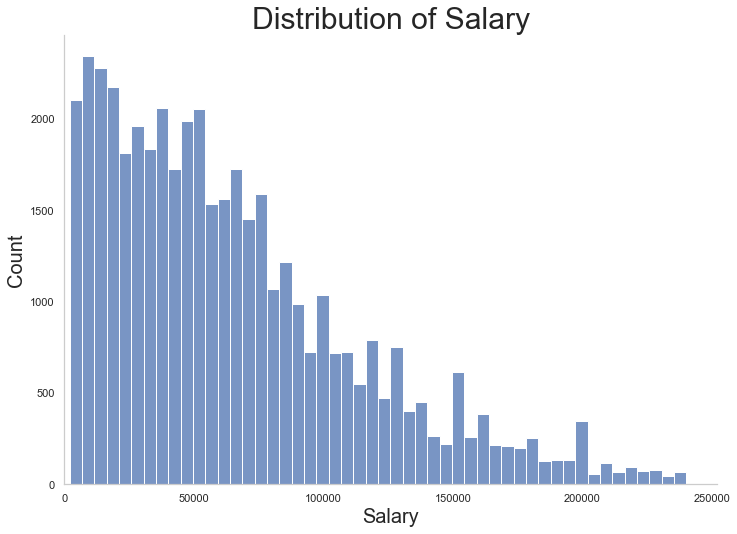

In [22]:
# Plot distribution
ax = sns.histplot(df["ConvertedCompYearly"], bins=50)
plt.ticklabel_format(style='plain') # suppress scientific notation
ax.set_ylabel("Count",fontsize=20)
ax.set_xlabel("Salary",fontsize=20)
ax.set_title("Distribution of Salary", fontsize=30)
ax.set_xlim(xmin=0) # should start at 0 on x-axis
ax.spines['right'].set_visible(False) # remove right border
ax.spines['top'].set_visible(False) # remove left border

## Analyze categorical features

In [23]:
# Select categorical features
categorical_features = [
    'MainBranch',
    'Employment',
    'Country',
    'US_State',
    'UK_Country',
    'EdLevel',
    'Age1stCode',
    'LearnCode',
    'DevType',
    'OrgSize',
    'CompFreq',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith',
    'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith',
    'OpSys',
    'NEWStuck',
    'NEWSOSites',
    'SOVisitFreq',
    'SOAccount',
    'SOPartFreq',
    'SOComm',
    'NEWOtherComms',
    'Age',
    'Gender',
    'Trans',
    'Sexuality',
    'Ethnicity',
    'Accessibility',
    'MentalHealth'
]

In [24]:
# Print the number of unique cateogries for each variable.
for variable in df[categorical_features]:
    print(f"{variable}, {df[variable].nunique()}")

MainBranch, 2
Employment, 5
Country, 168
US_State, 52
UK_Country, 4
EdLevel, 9
Age1stCode, 9
LearnCode, 431
DevType, 6176
OrgSize, 10
CompFreq, 3
LanguageHaveWorkedWith, 16737
LanguageWantToWorkWith, 15921
DatabaseHaveWorkedWith, 2503
DatabaseWantToWorkWith, 2407
PlatformHaveWorkedWith, 104
PlatformWantToWorkWith, 121
WebframeHaveWorkedWith, 3997
WebframeWantToWorkWith, 3377
MiscTechHaveWorkedWith, 955
MiscTechWantToWorkWith, 1179
ToolsTechHaveWorkedWith, 674
ToolsTechWantToWorkWith, 1071
NEWCollabToolsHaveWorkedWith, 7374
NEWCollabToolsWantToWorkWith, 4287
OpSys, 6
NEWStuck, 1042
NEWSOSites, 8
SOVisitFreq, 5
SOAccount, 3
SOPartFreq, 6
SOComm, 6
NEWOtherComms, 2
Age, 8
Gender, 16
Trans, 4
Sexuality, 29
Ethnicity, 256
Accessibility, 26
MentalHealth, 33


There are some categorical features which have a lot of different categories. These features represent a problem. When we encode them with the one-hot-encoder, we get a matrix, which might be too large. We therefore need to either drop these features or preprocess/reduce them in some form. For now, we will just visualize the relationship of the features with few categories (<=100) and the salary. 

In [26]:
# Categorical features with more than 100 categories (high cardinality hc) are saved in a list.
categorical_features_hc = [column for column in df[categorical_features].columns if df[column].nunique() > 100]

# Categorical features with less than or equal to 100 categories (low cardinality lc) are saved in a list.
categorical_features_lc = [column for column in df[categorical_features].columns if df[column].nunique() <= 100] 

<ipython-input-27-ad22aa0e9ced>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


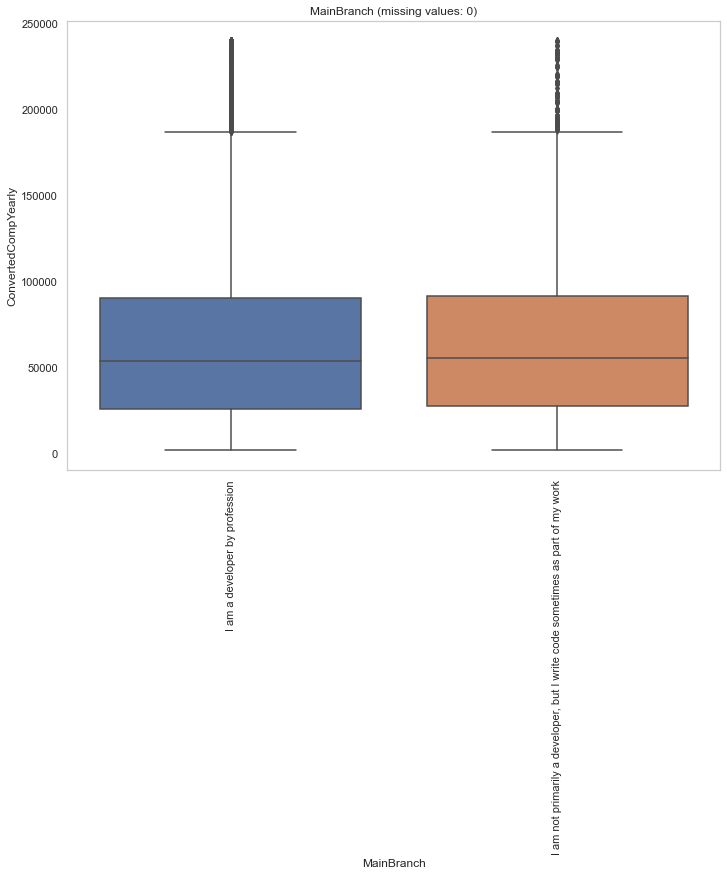

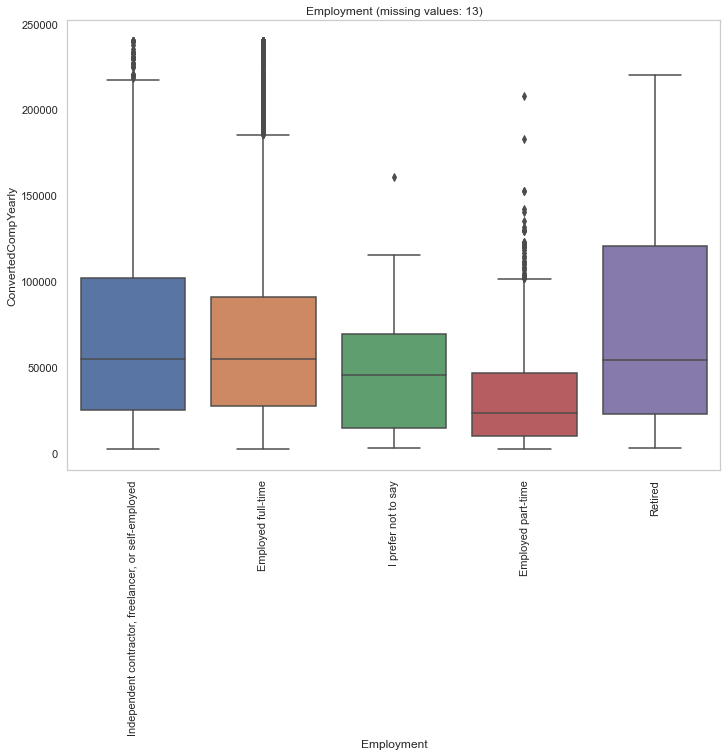

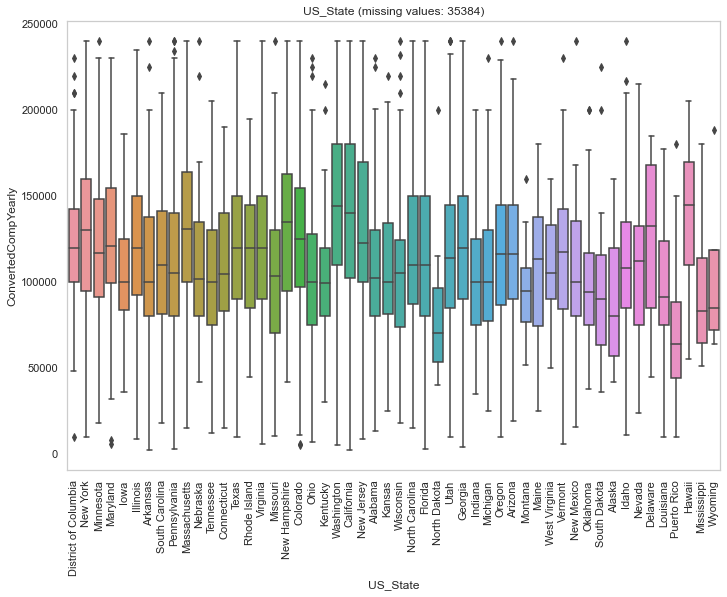

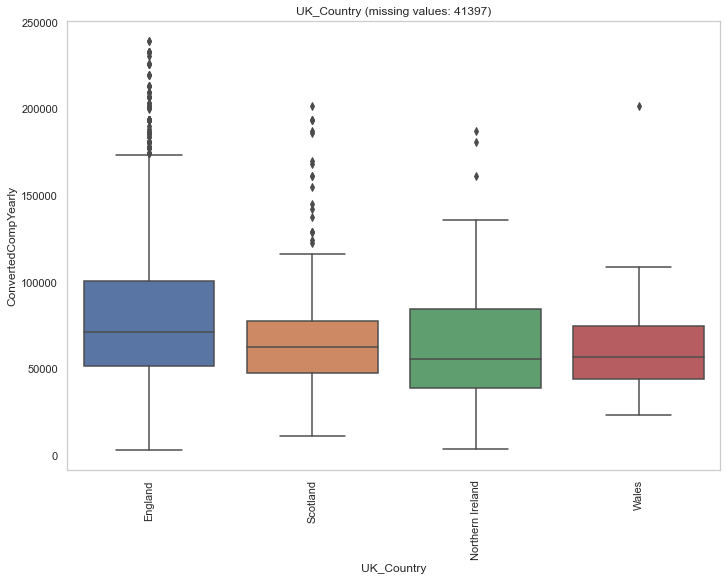

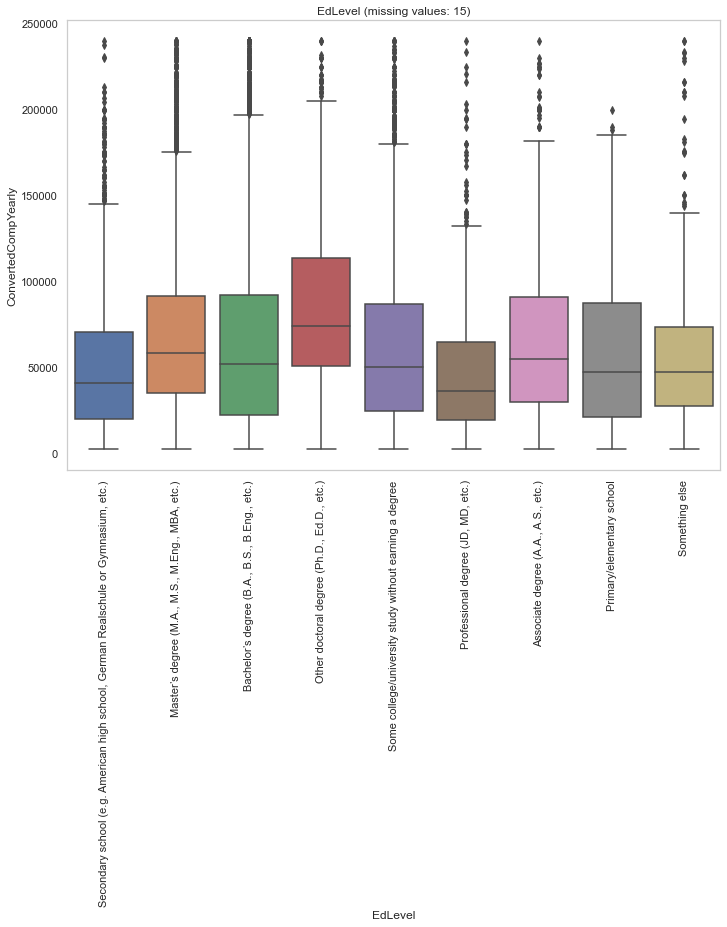

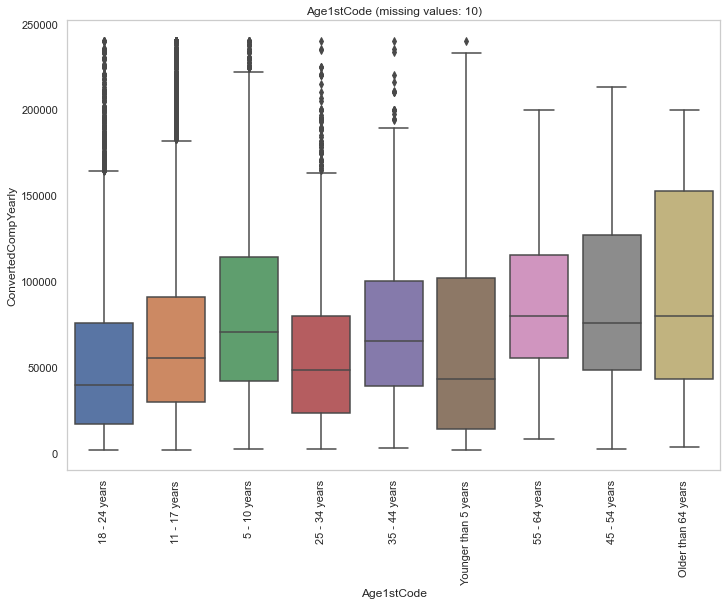

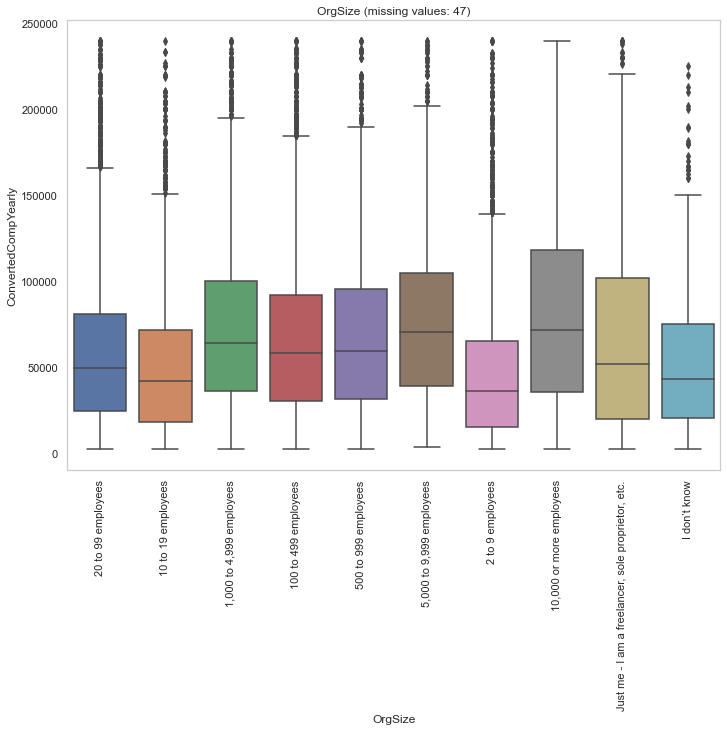

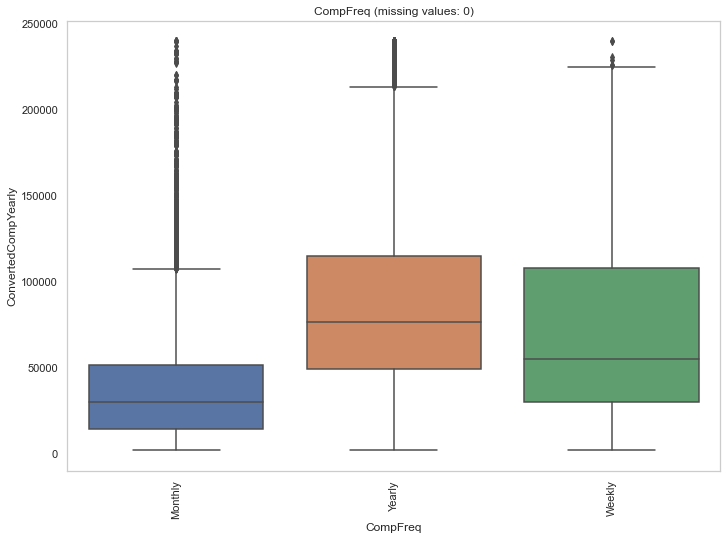

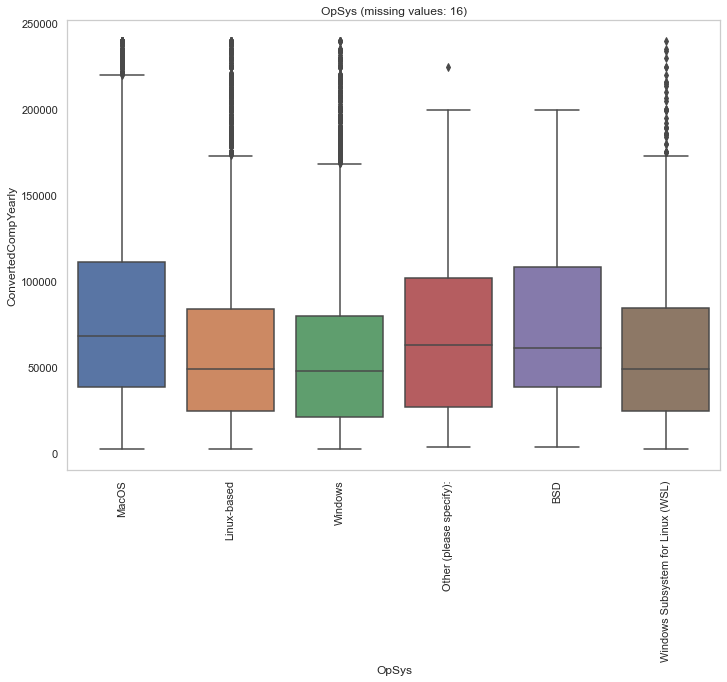

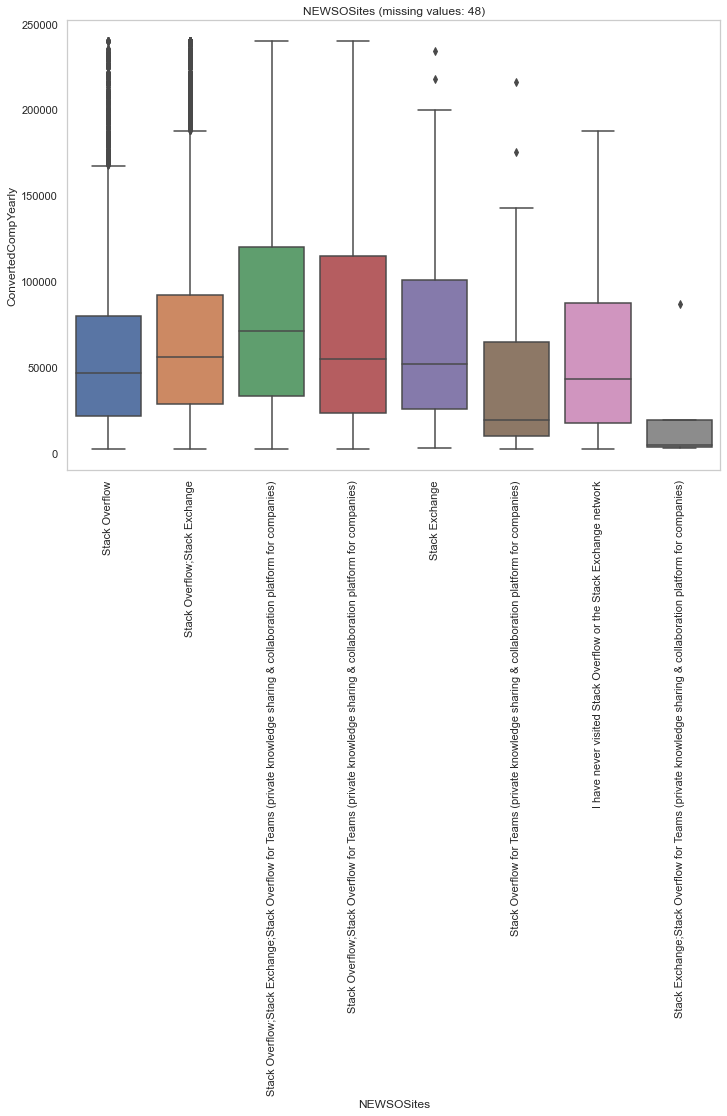

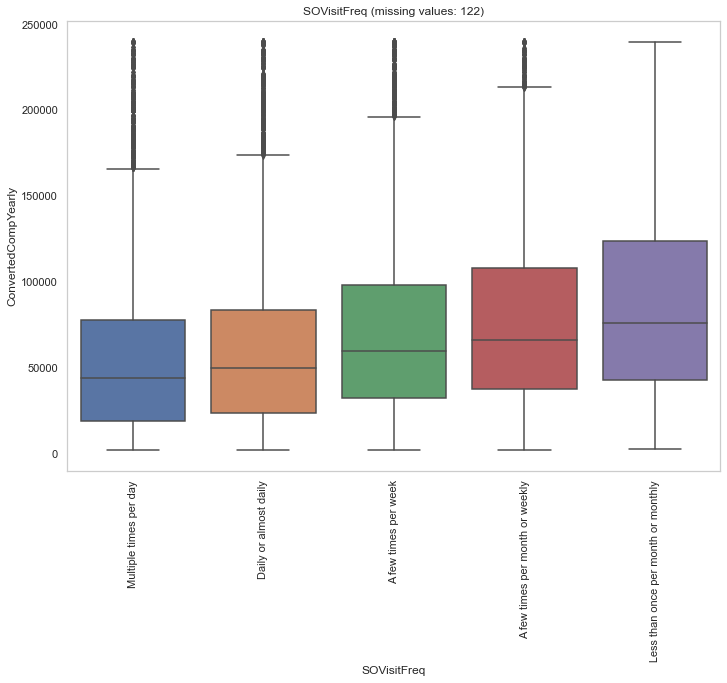

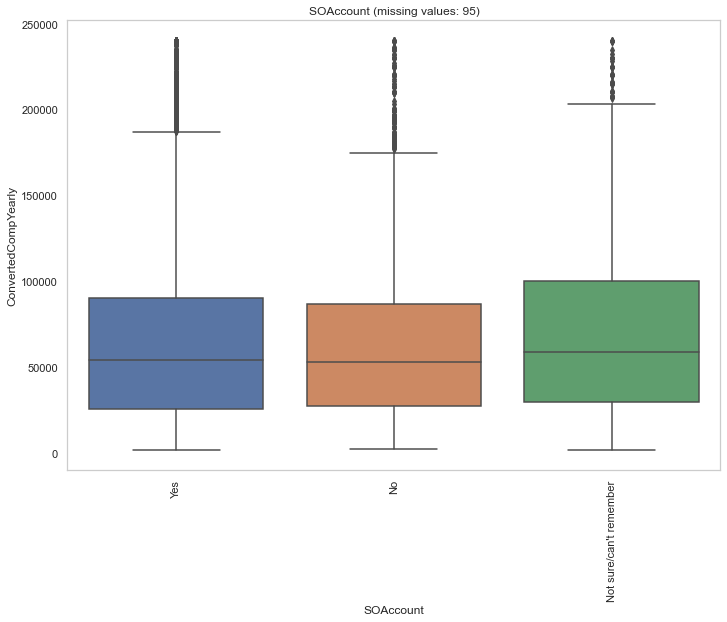

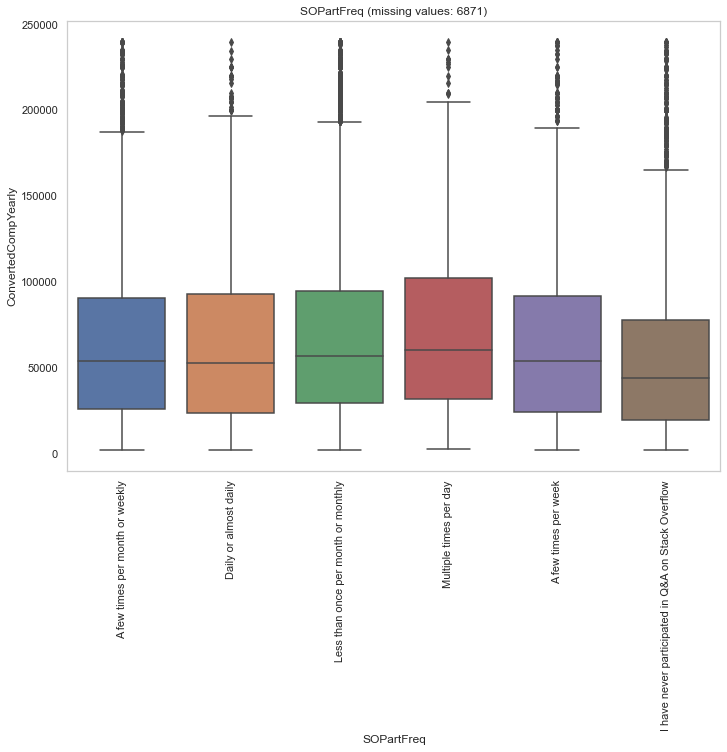

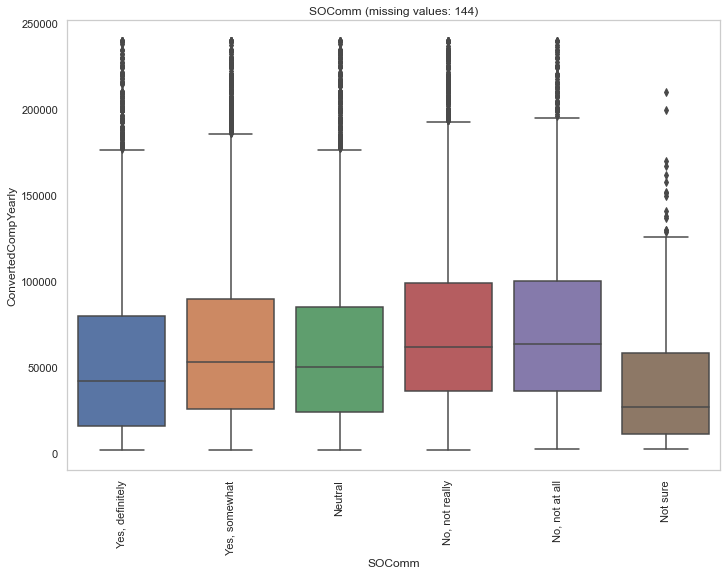

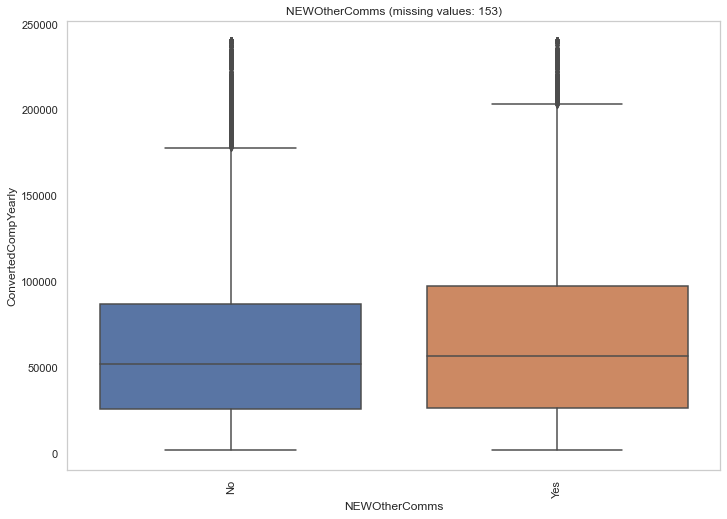

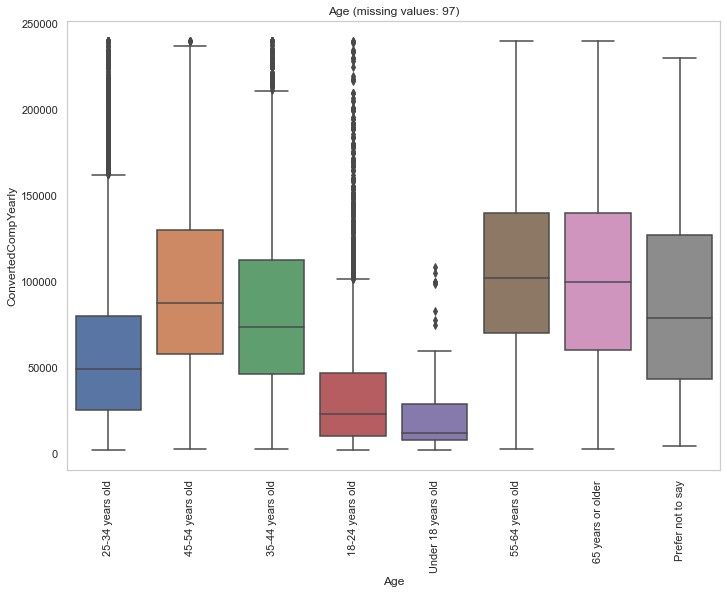

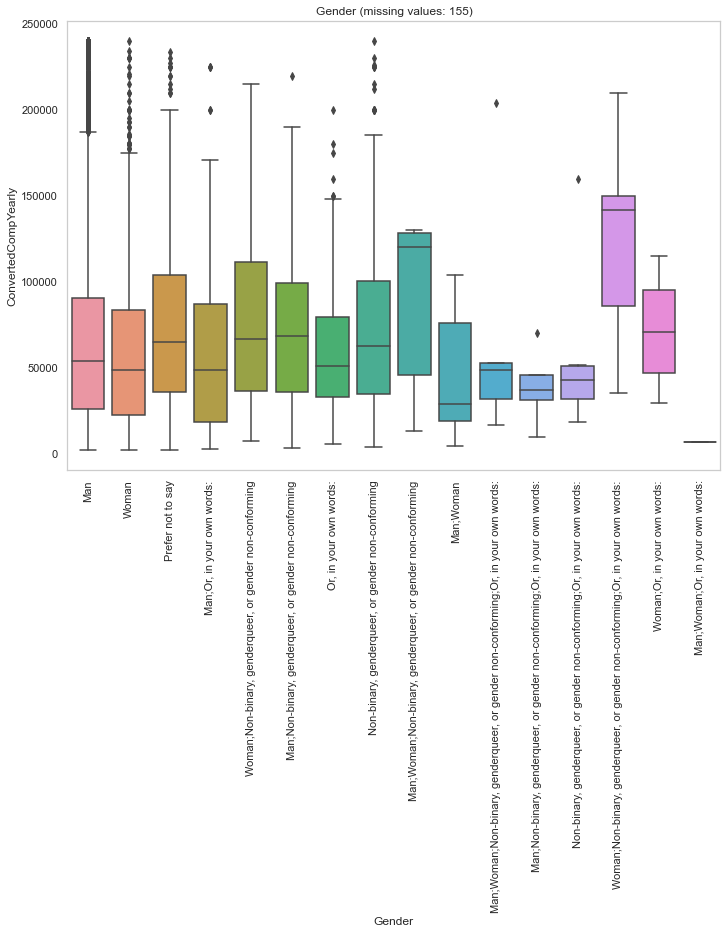

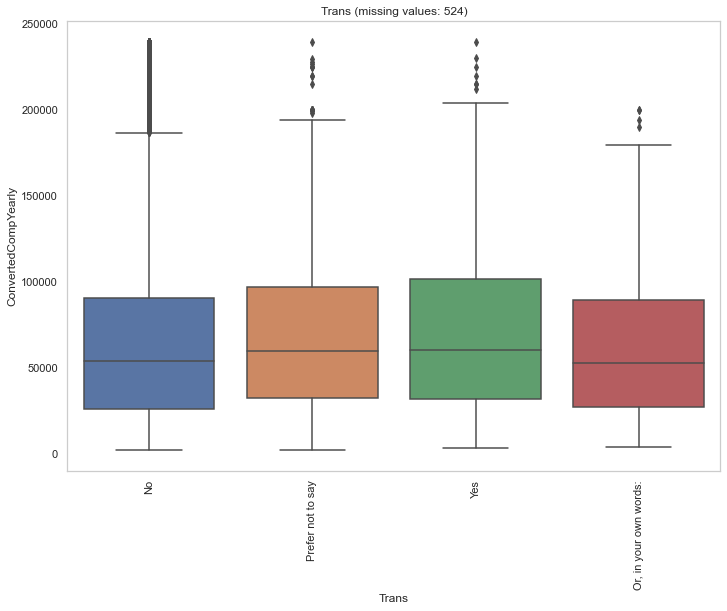

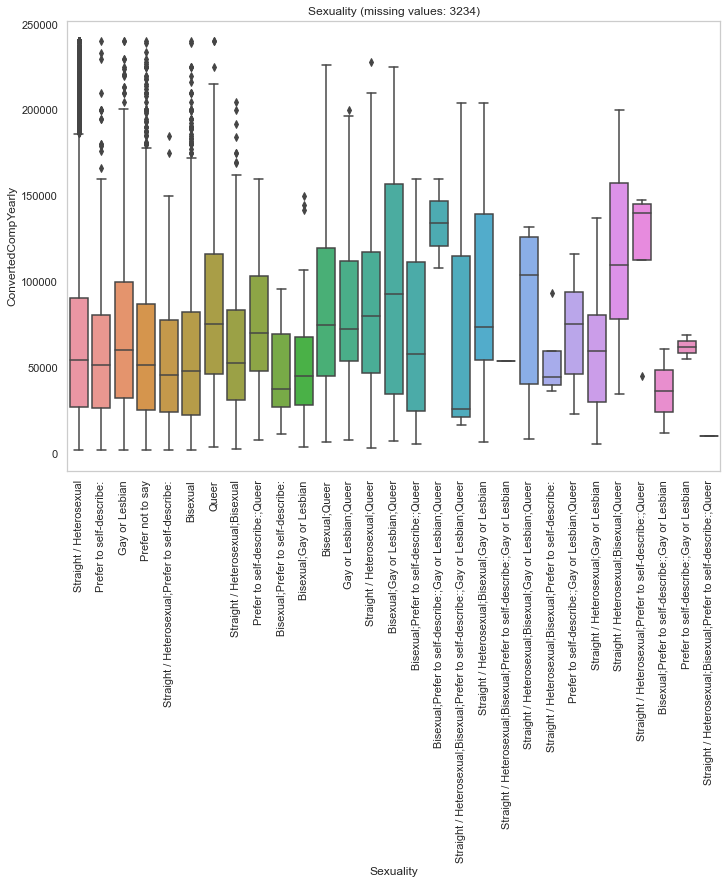

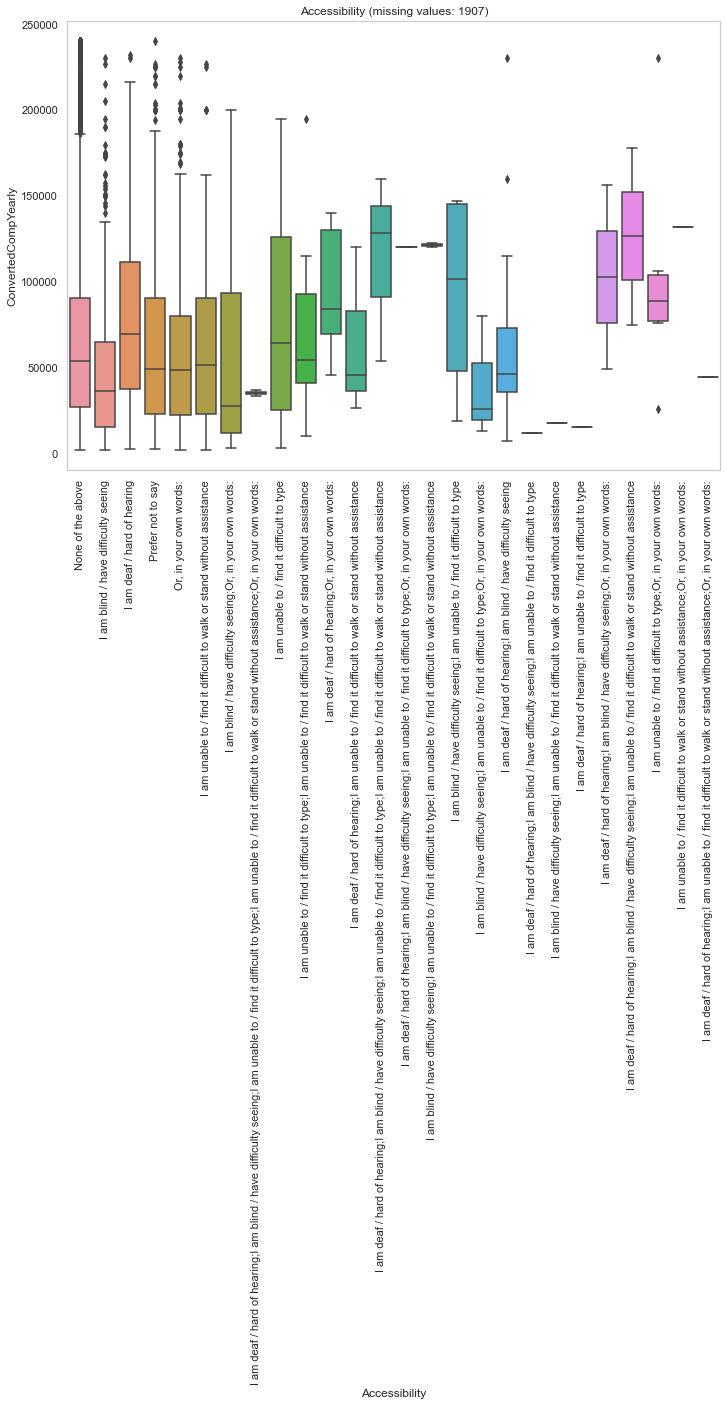

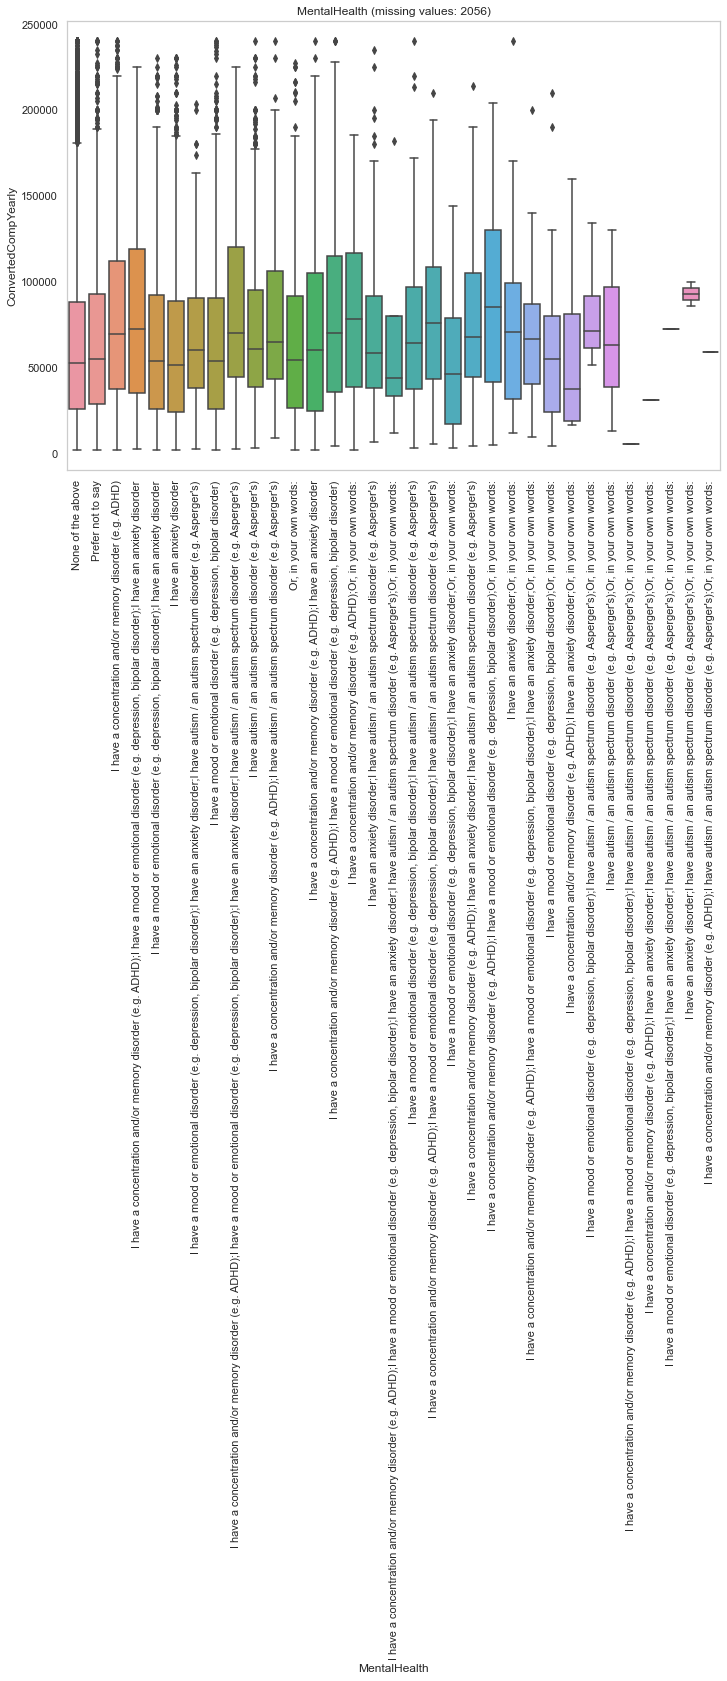

In [27]:
# Create boxplots of the categorical variables with low cardinality. The dependent variable is "ConvertedCompYearly".
for i, feature in enumerate(categorical_features_lc):
    plt.figure(i)
    fig = sns.boxplot(x=feature, y="ConvertedCompYearly", data=df)
    plt.xticks(rotation=90)
    plt.title(f"{feature} (missing values: {df[feature].isna().sum()})")

## Analyze numerical features

In [28]:
# Select numerical features
numerical_features = [
        'YearsCode',
        'YearsCodePro'
]

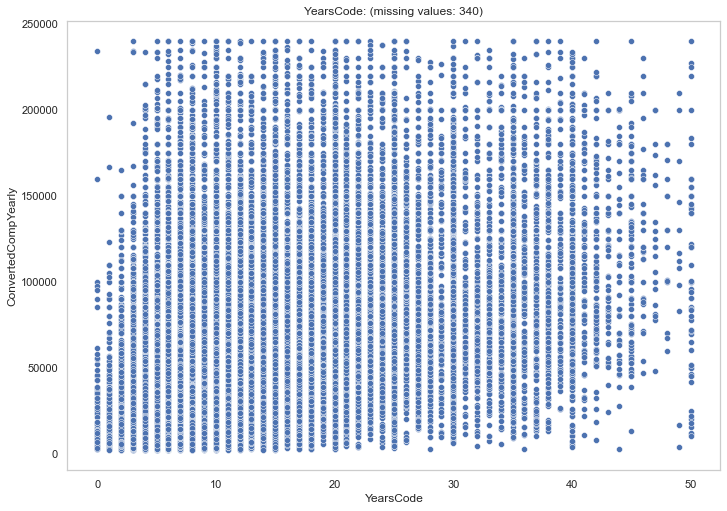

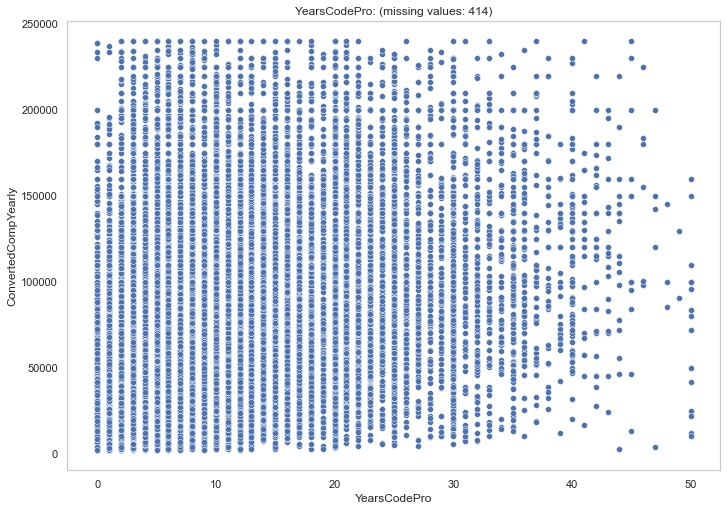

In [30]:
# Generate scatterplots for the numerical variables. The dependent variable is "ConvertedCompYearly".
for i, column in enumerate(numerical_features):
    plt.figure(i)
    sns.scatterplot(data=df, x=column, y="ConvertedCompYearly")
    plt.title(f"{column}: (missing values: {df[column].isna().sum()})")

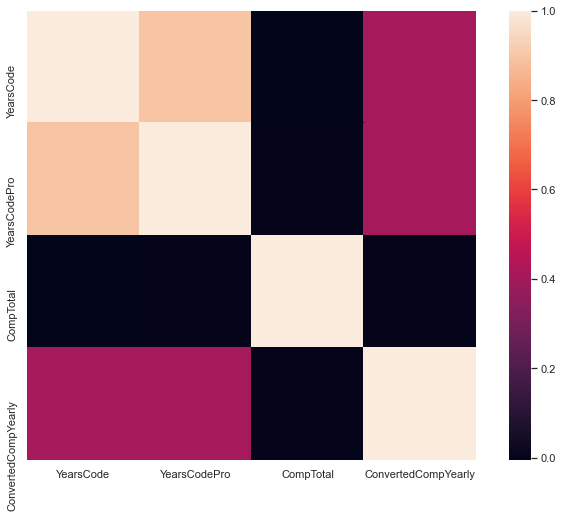

In [31]:
# Generate correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, square=True);

Obviously, YearsCode and YearsCodePro are highly correlated. We can exclude one of these variables.

# 2 ) Feature engineering

Based on the visualization we are going to select the following variables as independent variables in our model:
 - Country
 - Technologies someone has worked with
 - EdLevel
 - OpSys
 - Age
 - OrgSize

 - YearsCodePro

We need to engineer some of these features to be able to feed them into our ML-Model.

## Country

There are 167 different countries. It might be a good idea to reduce this feature. We only keep the 15 most frequent countries. Encode everything else as "Other". --> New variable: Country_reduced

In [32]:
# The 15 most frequent countries represent ca. 70% of the dataset. 
df["Country"].value_counts().head(15).sort_values(ascending=False)/len(df)

United States of America                               0.20
India                                                  0.08
Germany                                                0.07
United Kingdom of Great Britain and Northern Ireland   0.06
Canada                                                 0.04
Brazil                                                 0.04
France                                                 0.04
Poland                                                 0.03
Netherlands                                            0.02
Spain                                                  0.02
Australia                                              0.02
Russian Federation                                     0.02
Italy                                                  0.02
Sweden                                                 0.02
Turkey                                                 0.01
Name: Country, dtype: float64

In [33]:
# Function to reduce a feature to X most frequent categories (number_of_categories in function).
def reduce_feature(df, feature, number_of_categories):
    
    # Get the names of the X most frequent categories
    categories_to_keep = list(df.groupby(feature).size().sort_values(ascending=False).head(number_of_categories).index)
    
    # Create a function which checks, if the value is in the most frequent categories.
    def reduce(row):
        if row in categories_to_keep:
            return row
        else:
            return "Other" # Encode everything else as "other"
    
    # Apply the function on the dataframe
    df[feature+"_reduced"] = df[feature].apply(reduce)
    
    return df

In [34]:
# Reduce "Country" to 15 most frequent categories. 
df = reduce_feature(df, "Country", 15)

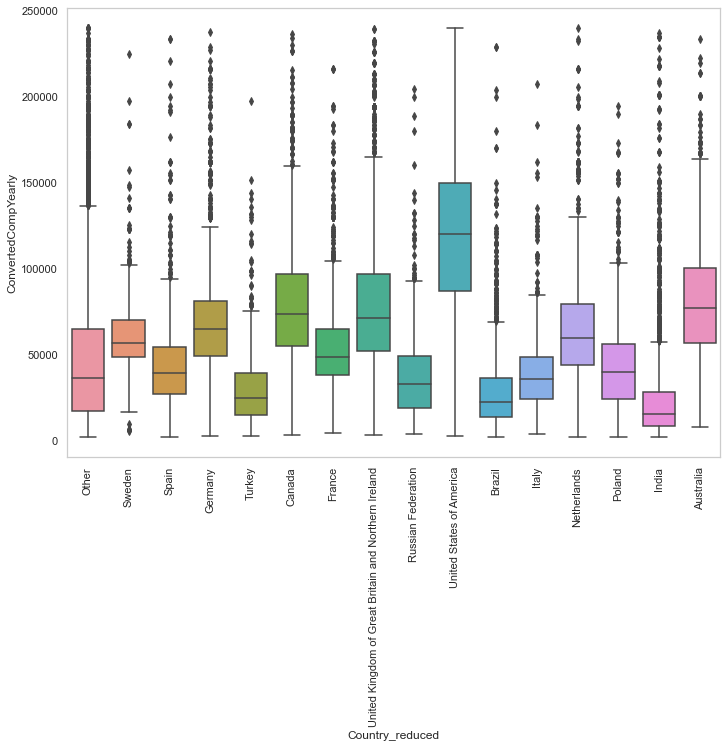

In [35]:
# Create boxplot of the variable "Country_reduced". The dependent variable is "ConvertedCompYearly".
fig = sns.boxplot(x="Country_reduced", y="ConvertedCompYearly", data=df)
plt.xticks(rotation=90);

## Technologies someone has worked with

The developers could state with which technologies (programming languages, databases, frameworks,...) they have worked with during the last year. We first summarize all these technologies in one variable called "all_tools". Then, we build clusters for the variable "all_tools". The goal is to assign each person to a cluster and then use the assigned cluster as a variable in the regression analysis. For clustering we first calculate the tfidf-matrix of the variable "all_tools. We then apply kmeans on the tfidf-matrix. Since this variable only contains the names of the languages, databases,... we do not need to filter out stopwords, lemmatize, etc.

In [36]:
used_tools = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "MiscTechHaveWorkedWith", 
    "WebframeHaveWorkedWith",
    "ToolsTechHaveWorkedWith", 
    "PlatformHaveWorkedWith"]
# Fill NAs with empty strings
df[used_tools] = df[used_tools].fillna("")

In [37]:
# Create new variable, which contains all languages, databases,... for a developer. 
df["all_tools"] = df["LanguageHaveWorkedWith"] + ";" + df["DatabaseHaveWorkedWith"] + ";" + df["MiscTechHaveWorkedWith"] + ";" + df["WebframeHaveWorkedWith"] + ";" + df["ToolsTechHaveWorkedWith"] + ";" + df["PlatformHaveWorkedWith"] 
df["all_tools"] = df["all_tools"].str.replace(r"[;]+", ";", regex=True)
df["all_tools"] = df["all_tools"].str.replace(" ", "")

In [38]:
# Replace the semicolons with spaces
stack = list(df["all_tools"].str.replace(";"," "))

In [39]:
# Create tfidf-matrix
tfidfvectorizer = TfidfVectorizer()
vector = tfidfvectorizer.fit_transform(stack)
tfidf_matrix = pd.DataFrame(vector.toarray(), columns = tfidfvectorizer.get_feature_names())

Perform clustering with different number of clusters and evaluate the optimal number of clusters based on the silhouette score.

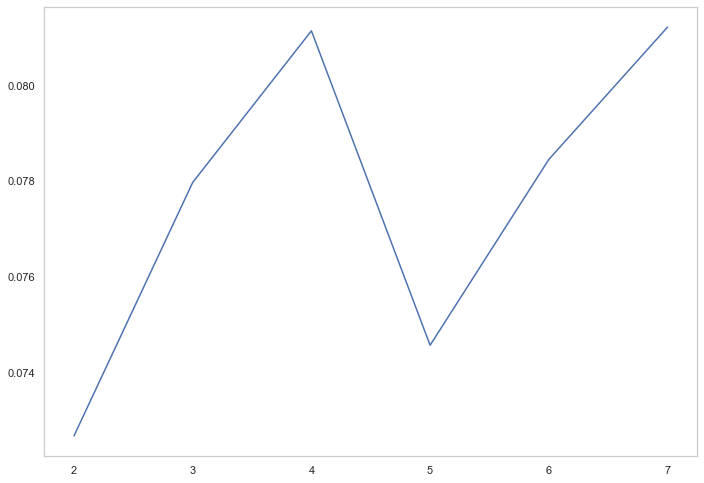

In [40]:
S_Scores = []
# Perform clustering with different number of clusters
for i in range(2,8):
    km_model = KMeans(n_clusters = i, random_state = 1).fit(tfidf_matrix)
    clusters = km_model.fit_predict(tfidf_matrix)
    S_Score = silhouette_score(tfidf_matrix, clusters) # Calculate silhouette score
    S_Scores.append(S_Score) # append silhouette score to list

cluster_number = range(2,8)


sns.lineplot(x= cluster_number,y= S_Scores);

We can see, that 4 or 7 clusters should be chosen based on the silhouette score. Maybe the optimal number of clusters would be even higher. However we do not check the silhouette score for more than 7 clusters, because it's difficult to interpret more than 7 clusters. We choose 7 clusters to perform the final cluster analysis.

In [41]:
kmeans = KMeans(n_clusters = 7, random_state=1).fit(tfidf_matrix)
clusters = kmeans.fit_predict(tfidf_matrix)

In [42]:
# Put cluster assignment into dataframe
df["Cluster"] = clusters

In [43]:
df["Cluster"].value_counts()

6    9596
4    8726
5    8535
3    5236
2    5099
0    4361
1    2500
Name: Cluster, dtype: int64

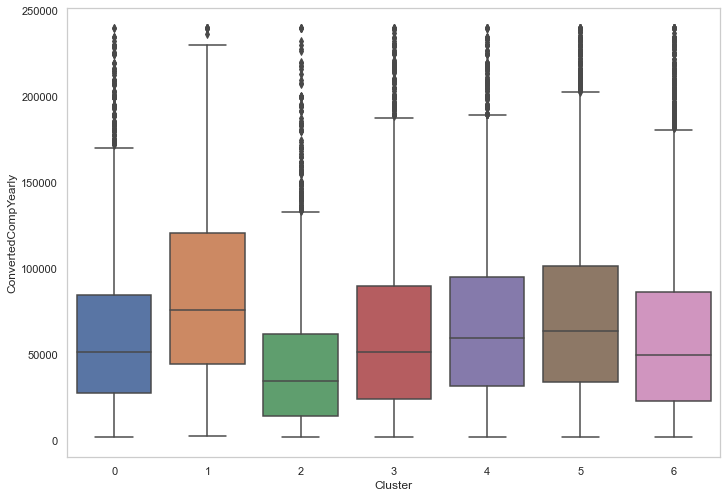

In [44]:
sns.boxplot(x="Cluster", y="ConvertedCompYearly", data = df);

Create a wordcloud with the used technologies for each cluster.

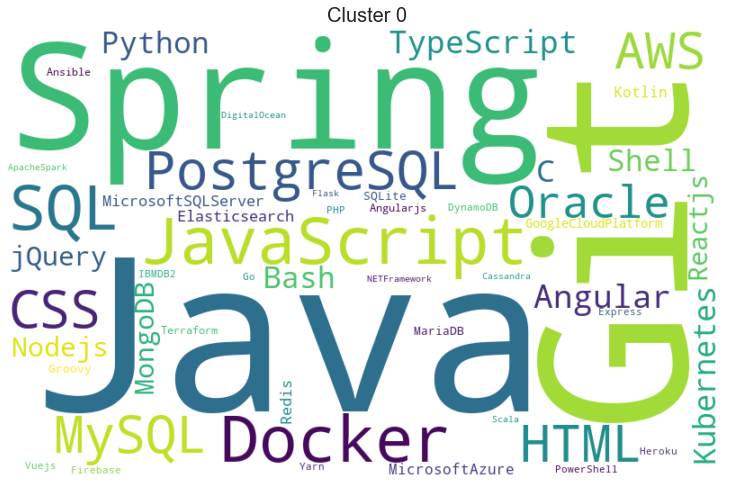

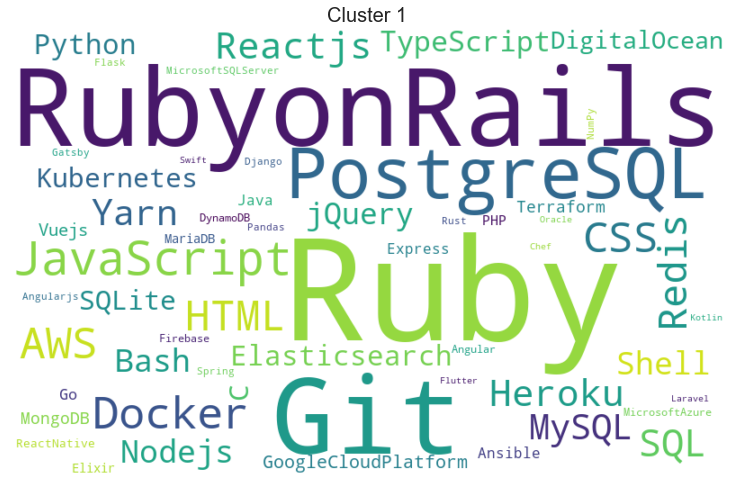

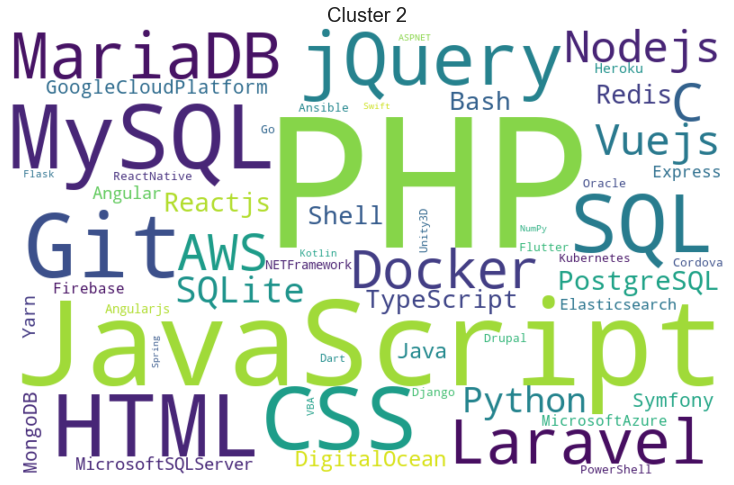

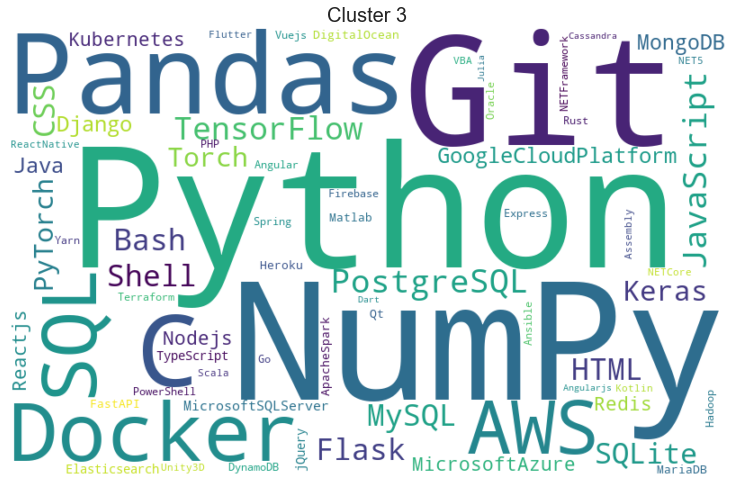

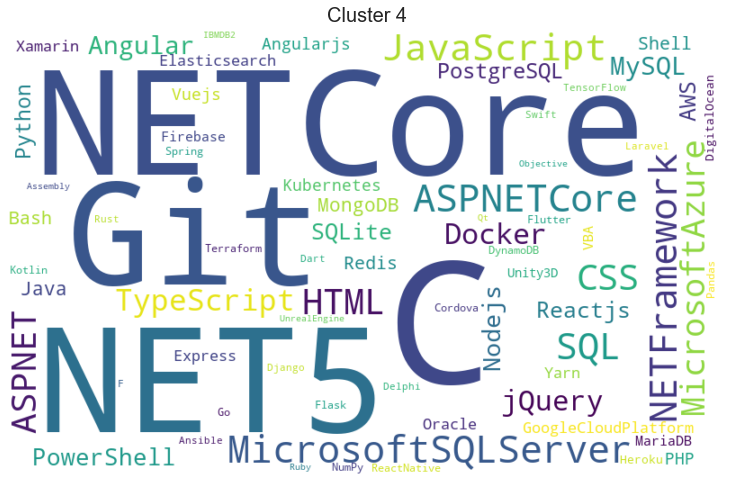

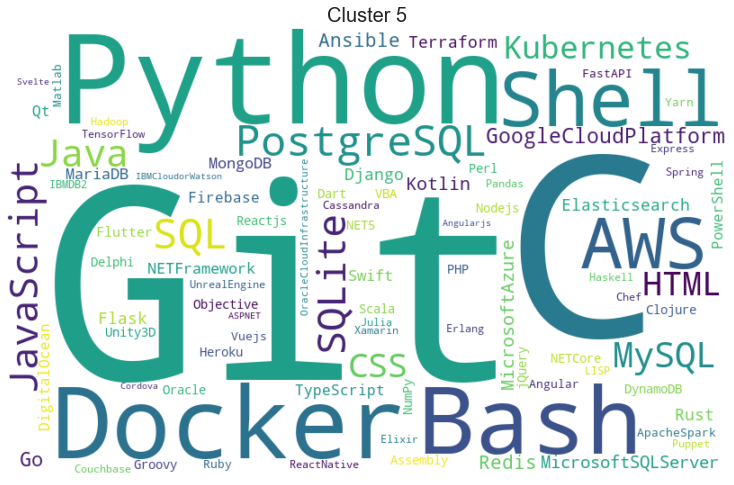

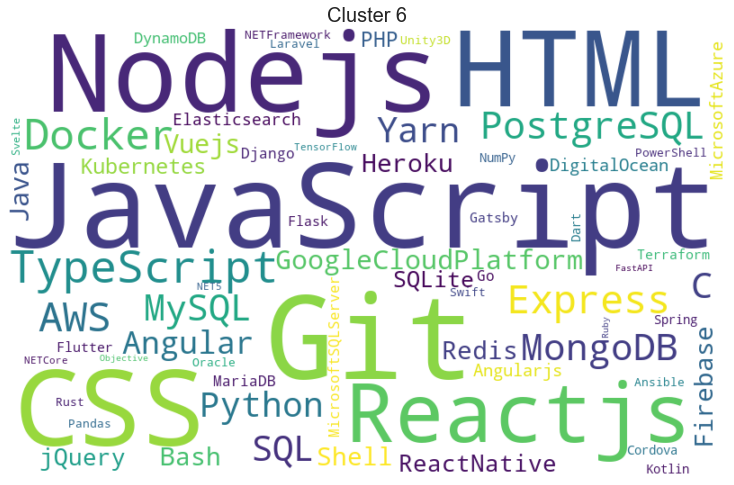

In [45]:
for cluster in range(0,7):
    df_cluster = df.loc[df["Cluster"]==cluster, "all_tools"].str.replace(";", " ")
    df_cluster = df_cluster.str.replace(".", "", regex=False)
    df_cluster = " ".join(df_cluster)
    # Create Wordcloud
    wordcloud = WordCloud(width = 800, height = 500,
                    background_color ='white',
                    min_font_size = 10, collocations = False).generate(df_cluster)
    plt.figure(figsize = (10,8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Cluster {cluster}", fontsize=20)
    plt.show()

The wordclouds help us understand what kind of developers are in which clusters.
 - 0: Java Developer
 - 1: Ruby Developer
 - 2: Web Developer
 - 3: Data Scientist
 - 4: .NET Developer
 - 5: C Developer
 - 6: Web Developer (Node and React)

# 3) Data preprocessing

In [46]:
# Choose relevant features
categorical_features = [
    'Cluster',
    'EdLevel',
    'OpSys',
    'Age',
    'Country_reduced',
    "OrgSize"
]

numerical_features = ['YearsCodePro']

In [47]:
# Put them toghether
features = numerical_features + categorical_features

In [48]:
X = df[features] # IV's
y = df["ConvertedCompYearly"] # DV

In [49]:
# Create a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
# Define pipelines for categorical and numerical features
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # first, impute the na's as "missing"
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))]) # then, one-hot encode the categorical features

numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer()), # first, impute missing value with mean (this is the default)
        ('scaler', StandardScaler())]) # then, standardize the features. 

In [51]:
# Define column transformer
preprocessor = ColumnTransformer(
        transformers=[
                ('num', numerical_transformer, numerical_features),
                ('cat', categorical_transformer, categorical_features)])

In [52]:
# Prepare data
X_train = X_train[features]
X_test = X_test[features]

In [53]:
# Preprocess the data from the train set
X_train = preprocessor.fit_transform(X_train)

# Preprocess the data from the test set
X_test = preprocessor.transform(X_test)

# 4) Regression Analysis

Train a simple neural network with 4 hidden layers

In [54]:
neural_network = MLPRegressor(random_state=1,
                              hidden_layer_sizes=(25,25,25,25),
                              max_iter=200,
                              verbose = True).fit(X_train, y_train) # fit the model

Iteration 1, loss = 3281114423.78872585
Iteration 2, loss = 1833842251.27906013
Iteration 3, loss = 835876788.68338406
Iteration 4, loss = 697891969.23440993
Iteration 5, loss = 617200479.46273541
Iteration 6, loss = 564811507.19625771
Iteration 7, loss = 532856646.24222428
Iteration 8, loss = 516402205.17052418
Iteration 9, loss = 508937858.63469160
Iteration 10, loss = 505921517.75123620
Iteration 11, loss = 503953335.60170639
Iteration 12, loss = 503050177.68025380
Iteration 13, loss = 501806205.06508261
Iteration 14, loss = 501237608.37188351
Iteration 15, loss = 500474815.81313634
Iteration 16, loss = 499581477.16976982
Iteration 17, loss = 499171311.10314339
Iteration 18, loss = 498632953.88168764
Iteration 19, loss = 498166342.42031306
Iteration 20, loss = 497969781.21955061
Iteration 21, loss = 497165223.05922335
Iteration 22, loss = 497060542.33751106
Iteration 23, loss = 496575961.16312063
Iteration 24, loss = 496081899.61992872
Iteration 25, loss = 495870155.66985756
Iterati

C:\Users\knitt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
y_pred = neural_network.predict(X_test)

In [56]:
predictions = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
print(predictions)

              Actual  Predicted
ResponseId                     
14074       97288.00   78231.75
55558      150000.00  170724.80
56220       77832.00   80433.86
7288        45000.00   80597.92
22687       12972.00   77408.16
...              ...        ...
22614       80000.00   86713.93
82637        8784.00   12410.06
27286       72800.00   72184.99
62172       75000.00   99207.66
77092        5585.00   12795.01

[8811 rows x 2 columns]


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


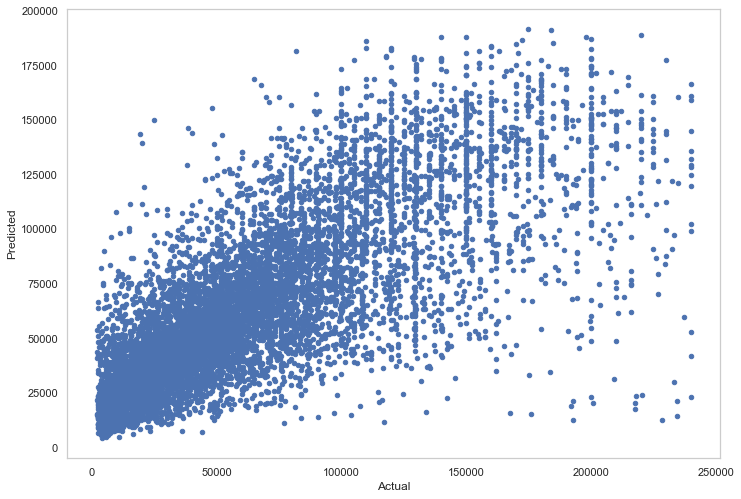

In [58]:
predictions.plot.scatter(x="Actual", y="Predicted");